# EXPLORING AND DESCRIBING DATA

### Essential imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import time

In [2]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import NMF
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy


## Converting our .csv files to pandas
*By doing this we can observe and use the content of csv files in a better way*

#### Loading BX-Books-Ratings-Test to panda

In [3]:
booksRatings_test = pd.read_csv('07/BX-Book-Ratings-Test.csv', sep=';', header=0)

#### Loading BX-Books-Train to panda
*Added encoding='latin-1' in the parameters because some bytes could not be decoded*

In [4]:
booksRatings_train = pd.read_csv('07/BX-Book-Ratings-Train.csv', sep=';', header=0, encoding='latin-1')

In [5]:
# Removing non-ASCII characters
booksRatings_train = booksRatings_train.replace({r'[^\x00-\x7F]+':''}, regex=True)

#### Loading BX-Books to panda
##### Here when trying to load BX-Books.csv to panda we have two problems


*1. Some rows did not have the same columns as the header so we skipped them.*

*2. Some bytes could not be decoded so we changed encoding to 'latin-1'*

In [6]:
books =  pd.read_csv('07/BX-Books.csv', sep=';', header=0, error_bad_lines=False, encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.p

In [7]:
# Removing non-ASCII characters
books = books.replace({r'[^\x00-\x7F]+':''}, regex=True)

#### Loading BX-Users to pandas
*Added encoding='latin-1' in the parameters because some bytes could not be decoded*

In [8]:
users = pd.read_csv('07/BX-Users.csv', sep=';', header=0, error_bad_lines=False, encoding='latin-1')

In [9]:
# Removing non-ASCII characters
users = users.replace({r'[^\x00-\x7F]+':''}, regex=True)

## Data observation

### Books' Dataframe

In [10]:
books.dtypes
books.columns = books.columns.str.replace('-', '_')

In [11]:
books.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


#### Here we observe that BX-Books.csv contains 8 different columns of information for each book. For each book (the key here is ISBN) information about the title of the book, its author, the year of its publication, the publisher as well as three links for photos of the book are given.

#### The url columns do not really help us anywhere in our calculations so we can drop them off.

In [12]:
books = books.drop(['Image_URL_S',"Image_URL_M","Image_URL_L" ], axis=1)

In [13]:
# Renaiming the columns
books.columns = ['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher']

books.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [14]:
books.count()

ISBN                 271360
BookTitle            271360
BookAuthor           271359
YearOfPublication    271360
Publisher            271358
dtype: int64

In [15]:
books.isna().sum()

ISBN                 0
BookTitle            0
BookAuthor           1
YearOfPublication    0
Publisher            2
dtype: int64

In [16]:
#books['YearOfPublication'] = books['YearOfPublication'].astype(int)
books.YearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

#### We can see from the above that "Gallimard" and "DK Publishing Inc" are mistakenly inside the years of publiation. Thus we are going to fix them.

In [17]:
pd.set_option('display.max_colwidth', -1)
books.loc[books.YearOfPublication == 'Gallimard', :]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le Cl?zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [18]:

books.loc[books.YearOfPublication == 'DK Publishing Inc', :]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [19]:
books.loc[books.ISBN == '2070426769', 'BookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"
books.loc[books.ISBN == '2070426769', 'BookAuthor'] = "Jean-Marie Gustave Le Clzio"
books.loc[books.ISBN == '2070426769', 'YearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769', 'Publisher'] = 'Gallimard'

books.loc[books.ISBN == '0789466953', 'BookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
books.loc[books.ISBN == '0789466953', 'BookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953', 'YearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953', 'Publisher'] = 'DK Publishing Inc'

books.loc[books.ISBN == '078946697X', 'BookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
books.loc[books.ISBN == '078946697X', 'BookAuthor'] = "James Buckley"
books.loc[books.ISBN == '078946697X', 'YearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X', 'Publisher'] = 'DK Publishing Inc'

In [20]:
books['YearOfPublication'] = books['YearOfPublication'].astype(int)
print(sorted(books.YearOfPublication.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [21]:
#test
print("Number of boos with year of publication greater than 2020: " + str(books[books.YearOfPublication > 2020].shape[0]) + "/" + str(len(books)))
print("Number of boos with year of publication 0: " + str(books[books.YearOfPublication == 0].shape[0]) + "/" + str(len(books)))

Number of boos with year of publication greater than 2020: 14/271360
Number of boos with year of publication 0: 4618/271360


####  From the above, we can see that there are many UNREAL values of "YearOfPublication" columns like 0 or years greaters than the current 2020th year. We will try to replace all these unreal values of "YearOfPublication" with real values. To do so, we will use either "mean" if the distribution of years is normal or "median" if the distribution of years is skewed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a241ff610>]],
      dtype=object)

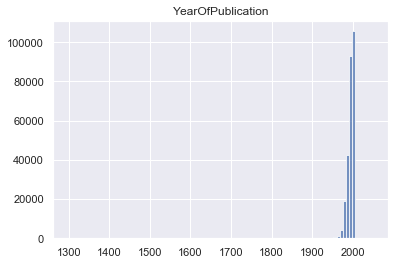

In [22]:
books.hist(column='YearOfPublication', bins=100, alpha=0.75, range=[1300,2050])

*And the distribution seems like negative skewed thus we are going to use "median" to fill unreal values.*

In [23]:
books.loc[(books.YearOfPublication > 2020), 'YearOfPublication'] = np.nan
books.loc[(books.YearOfPublication == 0), 'YearOfPublication'] = np.nan
books.YearOfPublication.fillna(round(books.YearOfPublication.median()), inplace=True)
books['YearOfPublication'] = books['YearOfPublication'].astype(int)
print(sorted(books.YearOfPublication.unique()))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020]


#### Checking if "YearOfPublication" column is free of NaNs. Just to be sure everything went fine.

In [24]:
books.isna().sum()

ISBN                 0
BookTitle            0
BookAuthor           1
YearOfPublication    0
Publisher            2
dtype: int64

#### Let's see how is the distribution now, that we have substitute unreal values with the median.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a241ec690>]],
      dtype=object)

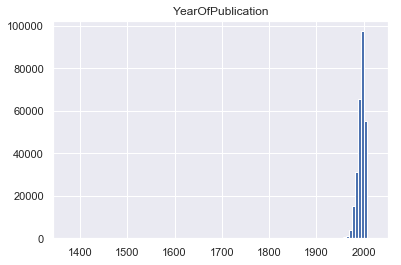

In [25]:
books.hist(column='YearOfPublication', bins=100)

*The number of years greater than 2020 and years 0 were 4632/271360, which is actually a really small part of the whole set of books, so this is why we do not have a serious change on the distribution after the substitution of unreal years with the median.*

In [26]:
print("The number of 0s in YearOfPublication column after using median is: " + str((books.YearOfPublication == 0).sum()))
print("The number of NaNs in YearOfPublication is: " + str(books.YearOfPublication.isna().sum()))

The number of 0s in YearOfPublication column after using median is: 0
The number of NaNs in YearOfPublication is: 0


##### Now...checking if this dataframe has any NaN values.

In [27]:
books.isna().sum()

ISBN                 0
BookTitle            0
BookAuthor           1
YearOfPublication    0
Publisher            2
dtype: int64

*Since there are some, we are going to check them. We do not know yet if we are going to use this information so we are not going to change them for now.*

In [28]:
books[books.isna().any(axis=1)]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


#### We can also check if there are are duplicated books in the dataframe: 

In [29]:
print("Number of unique books: " + str(books.ISBN.nunique()) + "/" + str(books.ISBN.count()))

Number of unique books: 271360/271360


*So all books are unique inside books' dataframe*

#### Now we can discover the authors with the most books.

In [30]:
top10_authors = books.BookAuthor.value_counts()[:10]
print("Top 10 authors with the most books written are: \n" + str(top10_authors))

Top 10 authors with the most books written are: 
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: BookAuthor, dtype: int64


In [31]:
print("There are " + str(books['BookAuthor'].nunique()) + ' unique authors out of ' + str(len(books)) + ' different books.')

There are 102018 unique authors out of 271360 different books.


#### As about the book publisher we could also find the top 10

In [32]:
top10_publishers = books.Publisher.value_counts()[:10]
print("Top 10 publisher with the most books published are: \n" + str(top10_publishers))

Top 10 publisher with the most books published are: 
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: Publisher, dtype: int64


#### We clean  "&amp" which is not proper.  e.x. "Simon &amp; Schuster "

In [33]:
books.Publisher = books.Publisher.str.replace('&amp;', '&', regex=False)

#### It would be interesting to check about repeated titles

In [34]:
top10_bookTitles = books.BookTitle.value_counts()[:10]
print("Top 10 publisher with the most books published are: \n" + str(top10_bookTitles))

Top 10 publisher with the most books published are: 
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Adventures of Huckleberry Finn    20
Dracula                           20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: BookTitle, dtype: int64


*Oops...there are plenty of repeated titles. Let's check why...*

In [35]:
books.loc[books.BookTitle == 'The Secret Garden', :]


,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
3759,0812505018,The Secret Garden,Frances Hodgson Burnett,1989,Tor Books
19955,0590433466,The Secret Garden,Frances H. Burnett,1997,Scholastic
29729,006440188X,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy
40444,0590471724,The Secret Garden,M.J. Carr,1993,Scholastic Paperbacks (Mm)
58789,0440977096,The Secret Garden,Frances Hodgson Burnett,1989,Laure Leaf
63044,0879236493,The Secret Garden,Frances Hodgson Burnett,1987,David R. Godine Publisher
66430,055321201X,The Secret Garden,Frances H. Burnett,1987,Bantam
66734,0439099390,The Secret Garden,Frances Hodgson Burnett,1999,Scholastic
74812,0440777062,The Secret Garden,Frances Hodgson Burnett,1979,Dell Publishing
75968,0812519108,The Secret Garden,Frances Hodgson Burnett,1991,Tor Books (Mm)


*As it seems, the same book from the same author may have plenty of unique ISBNs. This happens because the same book could either be published by different publishers or in different years. For example this is something that we should later consider because our goal is to recommend books. Perhaps it would be a good idea if we could give the same ISBN to the same books. But we will figure out this later when developing the recommendation system.*

### Users' DataFrame

In [137]:
users.dtypes

User_ID    int64  
Age        float64
City       object 
Region     object 
Country    object 
dtype: object

#### Taking a look of the first five rows of the users datafram.

In [138]:
users.head()

,User_ID,Age,City,Region,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


#### Here we observe that in the column "Location" three different infos are given so it would be better to split them in three columns in order to handle them better later.

In [38]:
users['City'], users['Region'], users['Country'] = users['Location'].str.split(',',2).str
users = users.drop(['Location'],axis=1)
users.head()

,User-ID,Age,City,Region,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


#### Checking how many different users we have.

In [39]:
users.rename(columns = {'User-ID':'User_ID'}, inplace=True)
users['User_ID'] = users['User_ID'].astype(int)
print("Number of different users is: " + str(users.User_ID.nunique()) + "/" + str(users.User_ID.count()))

Number of different users is: 278858/278858


*So all users are different*

#### We can also see expression "n/a" to be used instead of NaN so we are going to change this also.

In [40]:
new_users = users.replace(to_replace ="n/a", value = np.nan,  regex=True)
new_users = users.replace(to_replace ="", value = np.nan,  regex=True)

In [41]:
#pd.set_option('display.max_rows', None)
#print(new_users.tail(150))

#### We also observe that we have words "england" and "united kingdom" which represent the same so we keep only "england" by replacing "United Kingdom". We do the same for "united states of america" and "usa", "l'italia" and "italy".

In [42]:
new_users = new_users.replace(to_replace =["england, united kingdom","united kingdom"], value = "england",  regex=True)
new_users = new_users.replace(to_replace ="united states of america", value = "usa",  regex=True)
new_users = new_users.replace(to_replace ="l`italia", value = "italy",  regex=True)

#### Let's take a look at the ages now...

In [43]:
print(sorted(new_users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

#### As it seems there are some readers' ages which are unreal like 140 or 189 or 3.  First thought was to replace each age greater than 100 and smaller than 5 with the most probable value. We can calculate either the median or the mean of the ages in order to substitute unreal ages with this number. In order to find which of one of the two better fits this situation we are going to check the distribution of ages. If the distribution seems approximately normal "means" will be our choice! If the distribution is skewed we will go with the "median".

In [44]:
print("Total number of ages from different users: " + str(len(new_users)))
print("Total number of unknown ages: " + str(len(new_users) - new_users['Age'].count()))


Total number of ages from different users: 278858
Total number of unknown ages: 110762


*As it seems, we have 278858 users and the age of almost the half of them is missing. So finally we dicide that age is not a good metric since we have not a big knowledge about this. Thus we will not try to substitute missing ages or unreal with a mean or median value.*

#### But just to have an idea... we will check the distribution of existing ages from 0 to 100.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f0c80d0>]],
      dtype=object)

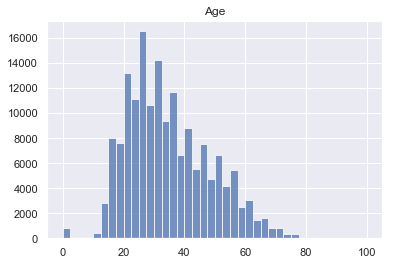

In [45]:
new_users.hist(column='Age', bins=40, alpha=0.75, range=[0,100])


/Users/costakis/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/costakis/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


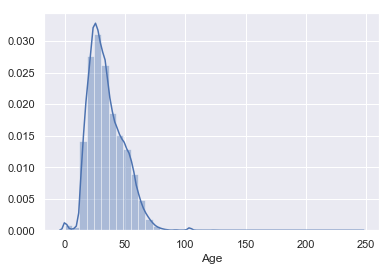

In [46]:
# Include gaussian kernel density estimate #
sns.distplot(new_users['Age'], color='b', bins=40, hist_kws={'alpha': 0.4});

##### As we can see in the above histograms, the distribution of ages is skewed positively. Thus in case we wanted to replace missing values with a real value we would use the median value.

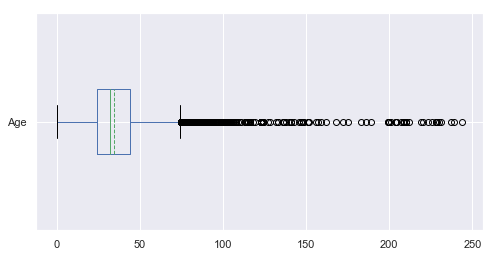

In [47]:
ax_age = new_users.boxplot('Age', vert=False, figsize=(8, 4), 
                            widths=0.3, showmeans=True, meanline=True)

*We have the same observations by using a boxplot. The distribution is concentrated at the ages of 20-40 but there are many unreal-outlier ages greater than 40.*

In [48]:
new_users.loc[(new_users.Age > 100) | (new_users.Age < 5), 'Age'] = np.nan
print(sorted(new_users.Age.unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30e49650>]],
      dtype=object)

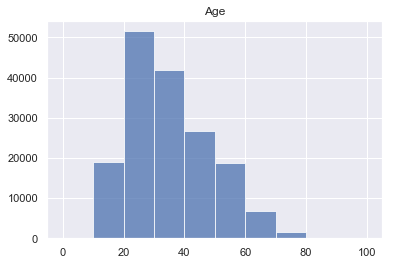

In [49]:
new_users.hist(column='Age', bins=10, alpha=0.75, range=[0,100])



*As we can understand from above, the most users are between 20-40 years old*

#### Lets check for NaN values in the whole dataframe of users...

In [50]:
new_users.isna().sum()

User_ID    0     
Age        112010
City       150   
Region     253   
Country    4563  
dtype: int64

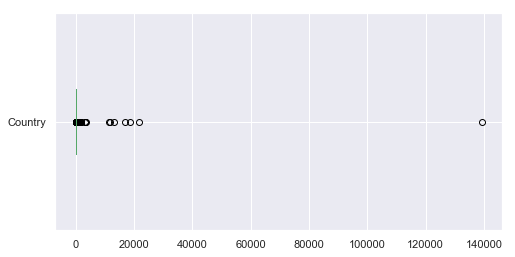

In [51]:
users_countries = pd.DataFrame(new_users.groupby('Country').Country.count().sort_values(ascending=False))
users_countries.rename(columns={"Country": "Population"})

ax_age = users_countries.boxplot('Country', vert=False, figsize=(8, 4), 
                            widths=0.3, showmeans=True, meanline=True)


*Taking a look at the distribution of Countries along with the ratings came from them, we have an outlier with the most users, and then all the other countires seem to have a lot less users who have rated.*

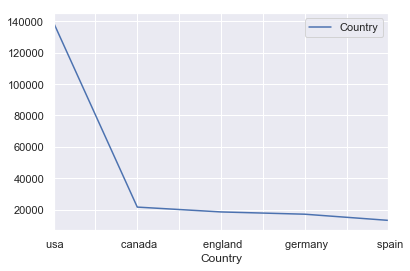

In [52]:
users_countries = users_countries.head()
users_countries.plot()

*The most users who have rated books are from USA with a great difference from Canada which is the second country with the most users who have rated.*

### Books Ranking (Training) Dataframe

#### This part is based ONLY on numerical variables.

*Also, by looking at "count" we can figure out how many ratings were calculated among all rows*

*It was important here to having already changed 0 values of Book-Rating to NaN because they just represent that a user has not rated a book and not that his rating was so bad.*

In [53]:
booksRatings_train.columns = booksRatings_train.columns.str.replace('-', '_')
booksRatings_train.dtypes

User_ID        int64 
ISBN           object
Book_Rating    int64 
dtype: object

In [54]:
booksRatings_train.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#### So we observe that BX-Book-Ratings-Train contains a list of Book-Ratings (1-10 for explicit ratings or 0 for implicit ratings)  that specific users gave to specific books. Each user may has given ratings for more than one book in the list as we can easily see from the 3rd and 4th row of the panda.

In [55]:
# Replacing 0 from Book-Ratings with NaN in order to be more easily understandable. We van do this 
# because ratings are in this scope: [1,10].
explicit_booksRatings_train = booksRatings_train.copy()
explicit_booksRatings_train["Book_Rating"] = explicit_booksRatings_train["Book_Rating"].replace(to_replace =0, value = np.nan,  regex=True)


In [56]:
print(explicit_booksRatings_train.dtypes)

User_ID        int64  
ISBN           object 
Book_Rating    float64
dtype: object


In [57]:
explicit_booksRatings_train["Book_Rating"].describe()

count    379020.000000
mean     7.599786     
std      1.838548     
min      1.000000     
25%      7.000000     
50%      8.000000     
75%      9.000000     
max      10.000000    
Name: Book_Rating, dtype: float64

*Interesting to say that the mean value of explicit rating is around 7,5.*

In [58]:
print("Number of unique users who have rated atleast a book: " + str(explicit_booksRatings_train.User_ID.nunique()) + "/" + str(explicit_booksRatings_train.ISBN.count()))

Number of unique users who have rated atleast a book: 91407/999999


In [59]:
print("Number of all rows: ")
booksRatings_train.shape

Number of all rows: 


(999999, 3)

#### So only 379.020/999.999 ratings are not 0, which is the actual portion of ratings from users.

In [60]:
booksRatings_train.isna().sum()

User_ID        0
ISBN           0
Book_Rating    0
dtype: int64

#### This part is based ONLY on non-numerical variables.

In [61]:
explicit_booksRatings_train.rename(columns = {'User-ID':'User_ID'}, inplace=True)
explicit_booksRatings_train['User_ID'] = booksRatings_train['User_ID'].astype(str)
explicit_booksRatings_train.loc[:, 'User_ID':'ISBN'].describe()

,User_ID,ISBN
count,999999,999999
unique,91407,313704
top,11676,0971880107
freq,13602,2143


*From the above we see that inside the 999999 rows of the ratings dataframe, there are 91407 unique users and 313704 unique books. The ID of the user with the most ratings is "11676" and the ISBN of the book with the most ratings is  "0971880107".*

#### Let's find out the distribution of users and the number of the reviews they have given sofar.

In [62]:
users_who_rated = explicit_booksRatings_train.groupby('User_ID').ISBN.count().sort_values(ascending=False)

#super_users = book_ratings.groupby('user_id').isbn.count().sort_values(ascending=False)
print("Top 10 users with the most ratings are:\n" + str(users_who_rated[:10]))

Top 10 users with the most ratings are:
User_ID
11676     13602
198711    7550 
153662    6109 
98391     5891 
35859     5850 
212898    4785 
278418    4533 
76352     3367 
110973    3100 
235105    3067 
Name: ISBN, dtype: int64


*Indeed, user 11676 who we found in the precious step, has given the most ratings (13602)!

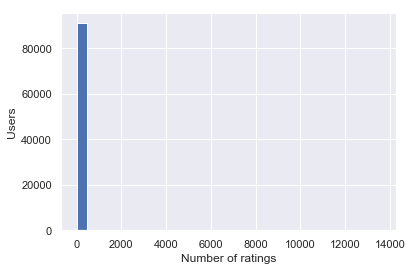

In [63]:
users_who_rated.hist(bins=30)
plt.xlabel('Number of ratings')
plt.ylabel('Users')
plt.show()

*As we can see from the plot, the most users have rated only a few books (less than 50), whereas those who have rated a big amount of books (more than 50) belong to the outliers. * 

In [64]:
# Keeping only users who have rated less than 50 books because the above histogram shows us that 
# the most values occure somewhere there.
# We also skip rating value 0 because this is not a real rating. Ratings are from 1 to 10.
part_users_who_rated = users_who_rated.where(users_who_rated < 50)

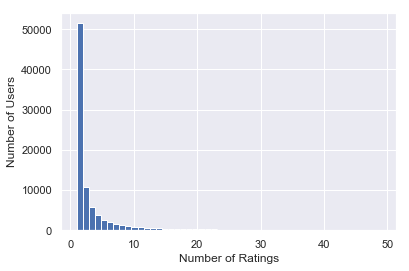

In [65]:

part_users_who_rated.hist(bins=50)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

*So the most users who have rated books, they have rated only one! After this the most have rated 2 or 3 books. Wherease the users who we saw earlier with very big numbers of ratings are outliers.*

#### And what about the distribution of the ratings?!

In [66]:
users_ratings_df = pd.merge(users,booksRatings_train,on='User_ID',how='inner')

users_ratings_df.drop(['City','Age', 'Region', 'Country'],axis=1,inplace=True)
users_ratings_df.head()

,User_ID,ISBN,Book_Rating
0,2,0195153448,0
1,7,034542252,0
2,8,0002005018,5
3,8,0060973129,0
4,8,0374157065,0


In [67]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [68]:
data = users_ratings_df['Book_Rating'].value_counts().sort_index(ascending=False)
data

10    68104 
9     59251 
8     90883 
7     67039 
6     32277 
5     44760 
4     7671  
3     5144  
2     2366  
1     1525  
0     620979
Name: Book_Rating, dtype: int64

*Above we can see the exact occurence of each one of the ratings. We observe that the majority is 0 (which represents the emplicit method), and then the most ratings are from 7 to 10.*

#### Different Kinds of plots to observe distribution of ratings...

In [69]:
data = users_ratings_df['Book_Rating'].value_counts().sort_index(ascending=False)

trace = go.Bar(x=data.index,
              text = ['{:.2f}%'.format(val) for val in (data.values/users_ratings_df.shape[0]*100)],
              textposition = 'auto',
              textfont = dict(color='#000000'),
              y = data.values,)

layout = dict(title= 'Distribution of book ratings (training set)',
              xaxis= dict(title='Rating'),
              yaxis= dict(title= 'Number of Ratings'))

fig = go.Figure(data=[trace], layout= layout)
iplot(fig)

#### As it seems except from the majority of the ratings (62,15%) which are implicit (rating = 0) and we don't care about them, the most ratings seem to be somewhere from 7 to 10.

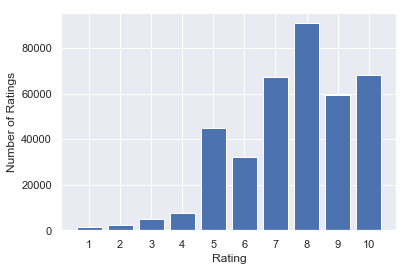

In [70]:
ratings =explicit_booksRatings_train.Book_Rating.value_counts().sort_index()


plt.bar(ratings.index, ratings.values)
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(range(1, 11))
plt.show()

*As it seems, the most of the ratings are good. Somewhere between 7-10. Impressive!*

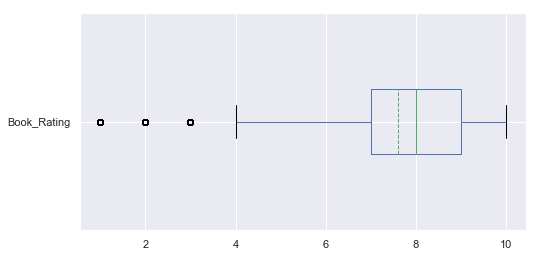

In [71]:
ax = explicit_booksRatings_train.boxplot('Book_Rating', vert=False, figsize=(8, 4), 
                            widths=0.3, showmeans=True, meanline=True)

*Again.. we are able to observe the following:*
*The Book_Rating variable is depicted with the horizontal line that is inside the box.*
*The circles show us that rating 1,2,3 are outliers (not common).*
*The distribution is concentrated on high ratings.*

### Books Ranking (Test) Dataframe

#### First of all it is good to knwo the types of the frame and how its rows look like. 
#### The truth is that we already know, because this set is similar to the training set which we have already explored but in order to be sure we are doing a small check.

In [72]:
booksRatings_test.dtypes

User-ID        int64 
ISBN           object
Book-Rating    int64 
dtype: object

In [73]:
booksRatings_test.columns = booksRatings_test.columns.str.replace('-', '_')
booksRatings_test.head()

,User_ID,ISBN,Book_Rating
0,240144,0373280033,0
1,240144,0373288980,0
2,240144,0375401091,0
3,240144,0375415661,0
4,240144,037570924X,0


#### Now let's check if there are any NaN values inside this dataset

In [74]:
booksRatings_test.isna().sum()

User_ID        0
ISBN           0
Book_Rating    0
dtype: int64

*There are not any NaN values which is great!*

#### Now let's find out how many unique users are there in this dataset. 

In [75]:
print("Number of unique users: " + str(booksRatings_test.User_ID.nunique()) + "/" + str(booksRatings_test.User_ID.count()))


Number of unique users: 13877/149781


*Reminder: Number of unique users in train set who have rated atleast a book: 13877/999999*

In [76]:
# Replacing 0 from Book-Ratings with NaN in order to be more easily understandable. We van do this 
# because ratings are in this scope: [1,10].
explicit_booksRatings_test = booksRatings_test.copy()
explicit_booksRatings_test["Book_Rating"] = explicit_booksRatings_test["Book_Rating"].replace(to_replace =0, value = np.nan,  regex=True)
explicit_booksRatings_test.head()


,User_ID,ISBN,Book_Rating
0,240144,0373280033,NaN
1,240144,0373288980,NaN
2,240144,0375401091,NaN
3,240144,0375415661,NaN
4,240144,037570924X,NaN


In [77]:
print(explicit_booksRatings_test.dtypes)

User_ID        int64  
ISBN           object 
Book_Rating    float64
dtype: object


In [78]:
explicit_booksRatings_test["Book_Rating"].describe()

count    54651.000000
mean     7.609943    
std      1.879792    
min      1.000000    
25%      7.000000    
50%      8.000000    
75%      9.000000    
max      10.000000   
Name: Book_Rating, dtype: float64

In [79]:
print("Number of unique users who have rated atleast a book: " + str(explicit_booksRatings_test.User_ID.nunique()) + "/" + str(explicit_booksRatings_test.ISBN.count()))

Number of unique users who have rated atleast a book: 13877/149781


In [80]:
print("Number of all rows: ")
booksRatings_test.shape

Number of all rows: 


(149781, 3)

#### So only 54.651/149.781 ratings are not 0, which is the actual portion of ratings from users.

In [81]:
explicit_booksRatings_test.rename(columns = {'User-ID':'User_ID'}, inplace=True)
explicit_booksRatings_test['User_ID'] = booksRatings_test['User_ID'].astype(str)
explicit_booksRatings_test.loc[:, 'User_ID':'ISBN'].describe()

,User_ID,ISBN
count,149781,149781
unique,13877,86259
top,245963,0971880107
freq,2507,359


*As is seems the testing dataset is a lot smaller than the training set. This is because fewer unique users and books exist in this. This is good, because we will have a serious training set in order to be able to wait for some serious predictions for the testing set.*

## Unifying datasets

###  Unifying books' and books' ratings datasets

In [82]:
# Train Dataset
onlyratings_booksRatings_train = explicit_booksRatings_train[explicit_booksRatings_train['Book_Rating'].notna()]
books_with_ratings_train = onlyratings_booksRatings_train.join(books.set_index('ISBN'), on='ISBN')

# Test Dataset
onlyratings_booksRatings_test = explicit_booksRatings_test[explicit_booksRatings_test['Book_Rating'].notna()]
books_with_ratings_test = onlyratings_booksRatings_test.join(books.set_index('ISBN'), on='ISBN')



In [83]:
books_with_ratings_train.head()

,User_ID,ISBN,Book_Rating,BookTitle,BookAuthor,YearOfPublication,Publisher
1,276726,0155061224,5.0,Rites of Passage,Judith Rae,2001.0,Heinle
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001.0,Cambridge University Press
6,276736,3257224281,8.0,NaN,NaN,NaN,NaN
7,276737,0600570967,6.0,NaN,NaN,NaN,NaN


In [84]:
books_with_ratings_train.shape

(379020, 7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2435b3d0>]],
      dtype=object)

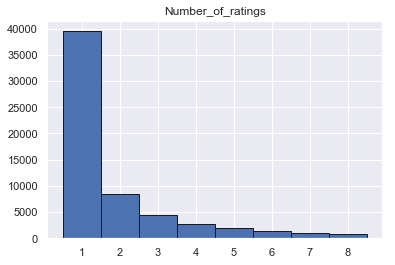

In [85]:
users_ratings_frequency = pd.DataFrame(books_with_ratings_train.groupby(['User_ID']).size(), columns = ["Number_of_ratings"])
users_ratings_frequency.hist(bins=np.arange(0,9)+0.5, ec="k")

*It is really obvious that the most usershave rated only one book.*

#### Now let's check if after the "join" we have any books without titles...


In [86]:
# Train Dataset
print("Number of books with raitings without title in Train Dataset: " + str(books_with_ratings_train.BookTitle.isnull().sum()))

# Test Dataset
print("Number of books with raitings without title in Test Dataset: " + str(books_with_ratings_test.BookTitle.isnull().sum()))

Number of books with raitings without title in Train Dataset: 43814
Number of books with raitings without title in Test Dataset: 6014


*Indeed, there are some books in the "books_with_ratings" which have not a title. We have to remove them immidiately from the dataset because later they will be a problem for us. If we don't have a title of a book we cannot recommend it.*

In [87]:
# Removing rows with missing title books

# Train Dataset
books_with_ratings_train.dropna(subset=['BookTitle'], inplace=True) 

# Test Dataset
books_with_ratings_test.dropna(subset=['BookTitle'], inplace=True) 



In [88]:
books_with_ratings_train.isna().sum()

User_ID              0
ISBN                 0
Book_Rating          0
BookTitle            0
BookAuthor           1
YearOfPublication    0
Publisher            2
dtype: int64

In [89]:
books_with_ratings_test.isna().sum()

User_ID              0
ISBN                 0
Book_Rating          0
BookTitle            0
BookAuthor           0
YearOfPublication    0
Publisher            0
dtype: int64

In [90]:
# Train Dataset
print("There are " + str(books_with_ratings_train.BookTitle.nunique()) + " unique book titles with ratings in Train Dtaset.")

# Test Dataset
print("There are " + str(books_with_ratings_test.BookTitle.nunique()) + " unique book titles with ratings in Test Dtaset.")

There are 124295 unique book titles with ratings in Train Dtaset.
There are 29950 unique book titles with ratings in Test Dtaset.


In [91]:
# Shape of Train Dataset
books_with_ratings_train.shape

(335206, 7)

In [92]:
# Shape of Test Dataset
books_with_ratings_test.shape

(48637, 7)

In [93]:
books_with_ratings_train.corr()

,Book_Rating,YearOfPublication
Book_Rating,1.000000,-0.007433
YearOfPublication,-0.007433,1.000000


*Year of publication of a book does not seem to have a strong correlation with Book Rating so we will not use this metric for our predictions later.*

#### This is a good moment to take a quick look at the average ratings of the books.

#### Lets find the top 10 rated books.
#### We will keep only books (let's say) with at least 30 ratings, because if we take into concideration even books with 1 or 2 ratings, then it is likely for the top-10 to be full of 10s which probably won't be representative of the truth.

In [94]:
counter_ratings = books_with_ratings_train.BookTitle.value_counts()
mean_rtg = books_with_ratings_train[books_with_ratings_train.BookTitle.isin(counter_ratings[counter_ratings>30].index)].groupby('BookTitle')['Book_Rating'].mean()
mean_rtg.sort_values(ascending=False)[:10] 

BookTitle
The Two Towers (The Lord of the Rings, Part 2)            9.328125
The Return of the King (The Lord of the Rings, Part 3)    9.271739
The Hobbit                                                9.204545
Love You Forever                                          9.187500
Charlotte's Web (Trophy Newbery)                          9.155172
The Stand (The Complete and Uncut Edition)                9.121212
Lonesome Dove                                             9.121212
Harry Potter and the Goblet of Fire (Book 4)              9.117647
Harry Potter and the Prisoner of Azkaban (Book 3)         9.108225
84 Charing Cross Road                                     9.075472
Name: Book_Rating, dtype: float64

#### And as about the worst 10 books...

In [95]:
mean_rtg.sort_values(ascending=False)[-10:]

BookTitle
Dr. Atkins' New Diet Revolution    6.500000
My Gal Sunday                      6.468085
The Sky Is Falling                 6.378378
The Little Friend                  6.325000
Sex &amp; the City                 6.222222
Violin                             5.921053
4 Blondes                          5.634146
Four Blondes                       5.533333
Isle of Dogs                       5.356322
Wild Animus                        4.461538
Name: Book_Rating, dtype: float64

*So...in general we can see that the average ratings of the books are quit good. The worst average rating is 4.46 for books with over 29 ratings and then it keeps going up to 9.33. Intresting!*

### Unifying books_with_ratings and users' datasets

In [96]:
# Train Dataset
books_with_ratings_train['User_ID'] = books_with_ratings_train['User_ID'].astype(int)
users_books_with_ratings_train = books_with_ratings_train.join(new_users.set_index('User_ID'), on='User_ID')
users_books_with_ratings_train.head()

,User_ID,ISBN,Book_Rating,BookTitle,BookAuthor,YearOfPublication,Publisher,Age,City,Region,Country
1,276726,0155061224,5.0,Rites of Passage,Judith Rae,2001.0,Heinle,NaN,seattle,washington,usa
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,16.0,rijeka,n/a,croatia
4,276729,0521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001.0,Cambridge University Press,16.0,rijeka,n/a,croatia
8,276744,038550120X,7.0,A Painted House,JOHN GRISHAM,2001.0,Doubleday,NaN,torrance,california,usa
16,276747,0060517794,9.0,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,25.0,iowa city,iowa,usa


In [97]:
# Test Dataset
books_with_ratings_test['User_ID'] = books_with_ratings_test['User_ID'].astype(int)
users_books_with_ratings_test = books_with_ratings_test.join(new_users.set_index('User_ID'), on='User_ID')
users_books_with_ratings_test.head()

,User_ID,ISBN,Book_Rating,BookTitle,BookAuthor,YearOfPublication,Publisher,Age,City,Region,Country
5,240144,0375815260,7.0,Charlie and the Chocolate Factory,ROALD DAHL,2001.0,Knopf Books for Young Readers,34.0,muskego,wisconsin,usa
21,240144,038073186X,7.0,Shutter Island,Dennis Lehane,2004.0,HarperTorch,34.0,muskego,wisconsin,usa
25,240144,0380782391,8.0,Larceny and Old Lace (Den of Antiquity),Tamar Myers,1996.0,Avon,34.0,muskego,wisconsin,usa
26,240144,0380784491,8.0,Murder Runs in the Family: A Southern Sisters Mystery,Anne George,1997.0,Avon,34.0,muskego,wisconsin,usa
28,240144,0380788217,9.0,Accessory to Murder: A Brenda Midnight Mystery (Brenda Midnight Mysteries),Barbara Jaye Wilson,1998.0,Avon Books,34.0,muskego,wisconsin,usa


In [98]:
# Train Dataset
users_books_with_ratings_train.dtypes

User_ID              int64  
ISBN                 object 
Book_Rating          float64
BookTitle            object 
BookAuthor           object 
YearOfPublication    float64
Publisher            object 
Age                  float64
City                 object 
Region               object 
Country              object 
dtype: object

In [99]:
# Test Dataset
users_books_with_ratings_test.dtypes

User_ID              int64  
ISBN                 object 
Book_Rating          float64
BookTitle            object 
BookAuthor           object 
YearOfPublication    float64
Publisher            object 
Age                  float64
City                 object 
Region               object 
Country              object 
dtype: object

In [100]:
# Train Dataset
users_books_with_ratings_train.isna().sum()

User_ID              0     
ISBN                 0     
Book_Rating          0     
BookTitle            0     
BookAuthor           1     
YearOfPublication    0     
Publisher            2     
Age                  101572
City                 114   
Region               404   
Country              9057  
dtype: int64

In [101]:
# Test Dataset
users_books_with_ratings_test.isna().sum()

User_ID              0    
ISBN                 0    
Book_Rating          0    
BookTitle            0    
BookAuthor           0    
YearOfPublication    0    
Publisher            0    
Age                  14253
City                 4    
Region               11   
Country              1423 
dtype: int64

*Although we have some missing values, the important columns of User_ID, ISBN, and Book Rating do not have any unknown values, which is good!*

## Recommendation Systems

## Suprprise
*Surprise is designed only for explicit documents, so we will not consider 0 rated books in neither of the training and testing sets.*

In [102]:
from surprise.model_selection import train_test_split
from surprise.model_selection import PredefinedKFold


#### First of all we are going to reduce the size of the dataset. We will do this by filtering out the most rarely rated books as well as the users who rarely rating. I decided to only keep books with more than 5 ratings and users who have rated more than 5 books. I did not want to make this minimun number bigger than 5, because as we have already seen from the plots above, the most users have given fewer that 10 ratings, so if we drop all of them of, we will lose an imoprtant amount of the distribution. Thus our estimations will not represent the reallity so much.

In [103]:
min_book_ratings=5
filter_books = users_books_with_ratings_train['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings=5
filter_users = users_books_with_ratings_train['User_ID'].value_counts() > min_user_ratings 
filter_users = filter_users[filter_users].index.tolist()

filtered_df= users_books_with_ratings_train[(users_books_with_ratings_train['ISBN'].isin(filter_books)) & (users_books_with_ratings_train['User_ID'].isin(filter_users))]
filtered_df = filtered_df.filter(['User_ID', 'ISBN', 'Book_Rating']) 
print('Original training dataframe shape: {}'.format(users_books_with_ratings_train.shape))
print('Modified training dataframe shape: {}'.format(filtered_df.shape))

Original training dataframe shape: (335206, 11)
Modified training dataframe shape: (106525, 3)


*The choice is to keep books with more ratings than 5 and users who have given more ratings than 5 because the dataset is really huge and we want to reduce it a lot in order for the next steps to take locigal amount of time.*

#### To load a dataset from a pandas dataframe, we will use the load_from_df() method, we will also need a Reader object, and the rating_scale parameter must be specified. The dataframe must have three columns, corresponding to the user ids, the item ids, and the ratings in this order. Each row thus corresponds to a given rating.

In [104]:
reader = Reader(rating_scale=(1,10))

# Train Dataset
training_set = filtered_df[['User_ID','ISBN','Book_Rating']].copy()
data_train = Dataset.load_from_df(training_set,reader)

# Test Dataset
testing_set = users_books_with_ratings_test.filter(['User_ID', 'ISBN', 'Book_Rating']).copy()
data_test = Dataset.load_from_df(testing_set, reader)


#### Now we are going to collect some benchmarks of the different algorithms which can be used by LightFm. Our intetion ofcourse is to finally keep the one which fits the most with our dataset, the one with the best root-mean-square error (RMSE).

In [105]:
start = time.time()
benchmark = []
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans()
                 ,KNNWithZScore(),BaselineOnly(), CoClustering()]:
    results = cross_validate(algorithm, data_train, measures=['RMSE'], cv=3, verbose=False)
    tmp= pd.DataFrame.from_dict(results).mean(axis=0)
    tmp= tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
    benchmark.append(tmp)
    
end = time.time()
elapsed = end - start
print("Total time needed for benchmarks: " + str(elapsed) + "seconds.")

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [106]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,1.586308,4.840535,0.319714
BaselineOnly,1.591357,0.292153,0.347798
SVDpp,1.593497,88.642809,3.286418
CoClustering,1.756066,3.499204,0.295589
KNNBaseline,1.784985,3.360911,1.430690
KNNWithZScore,1.788828,3.395253,1.397071
KNNWithMeans,1.798040,3.160341,1.309504
SlopeOne,1.925324,3.773239,2.105195
KNNBasic,1.947471,3.049625,1.323247


*SVD gave the best RMSE, but as we can observe from the benchmarks above, BaselineOnly algorithm's values of rmse, fit_time and test_time are really close to SVD's. So we are going to take a closer look of those two methods in order to compare their results.*

### SVD

In [107]:
algo = SVD()
print('Using ALS')
svd_als_cv = cross_validate(algo, data_train, measures=['RMSE', 'MSE', 'MAE', 'FCP'], cv=5, verbose=False)

Using ALS


#### No we are going to use fit() and test() methods which are going to train the algorithm and return the predictions for the testset, respectively.



In [108]:


start = time.time()

# Converting Train & Test Dataframes to csv files.
# I am doing this because I couldn't find an other way to pass the two dataframes for prediction.
filtered_df[['User_ID','ISBN','Book_Rating']].to_csv(r'TempTrainSet.csv',index=False, header=None)
users_books_with_ratings_test.filter(['User_ID', 'ISBN', 'Book_Rating']).to_csv(r'TempTestSet.csv', index = False, header = False)

# Creating a list of a pair of these to csv files.
folds_files = [("TempTrainSet.csv","TempTestSet.csv")]

# Making the reader to understand different column words when they are separated by ','
reader = Reader( sep=',',rating_scale=(1,10))

# Loading the cvs files which contain Train and Test Dataset  in order to be able to be used in Surprise
data = Dataset.load_from_folds(folds_files, reader=reader)
pkf = PredefinedKFold()

algo = SVD()

for trainset, testset in pkf.split(data):
    #Training & Testing algorithm
    algo.fit(trainset)
    predictions_svd = algo.test(testset)

    # Computing and printing Root Mean Squared Error (RMSE)
    accuracy.rmse(predictions_svd, verbose=True) # Root Mean Squared Error
    accuracy.mse(predictions_svd, verbose=True)  # Mean Squared Error
    accuracy.mae(predictions_svd, verbose=True)  # Mean Absolute Error
    accuracy.fcp(predictions_svd, verbose=True)  # Fraction of Concordant Pairs
    
    

end = time.time()
elapsed = end - start
print("\nTotal time needed for prediction: " + str(elapsed) + " seconds.")
#print("Number of predictions made: " + str(len(predictions)))


RMSE: 1.8584
MSE: 3.4537
MAE:  1.4754
FCP:  0.3115

Total time needed for prediction: 9.170643091201782 seconds.


In [109]:
predictions_svd[:10]


[Prediction(uid='240144', iid='0375815260', r_ui=7.0, est=7.711884962916146, details={'was_impossible': False}),
 Prediction(uid='240144', iid='038073186X', r_ui=7.0, est=7.625738307401234, details={'was_impossible': False}),
 Prediction(uid='240144', iid='0380782391', r_ui=8.0, est=7.711884962916146, details={'was_impossible': False}),
 Prediction(uid='240144', iid='0380784491', r_ui=8.0, est=7.615176752929879, details={'was_impossible': False}),
 Prediction(uid='240144', iid='0380788217', r_ui=9.0, est=7.711884962916146, details={'was_impossible': False}),
 Prediction(uid='240144', iid='0380788225', r_ui=9.0, est=7.711884962916146, details={'was_impossible': False}),
 Prediction(uid='240144', iid='0380793660', r_ui=8.0, est=7.711884962916146, details={'was_impossible': False}),
 Prediction(uid='240144', iid='038080056X', r_ui=9.0, est=7.711884962916146, details={'was_impossible': False}),
 Prediction(uid='240144', iid='0380801493', r_ui=7.0, est=8.115579914613848, details={'was_impos

#### Let's check randomly if the predictions are well expressed. We will check for example if User with ID 240144 from above has rated book with ISBN 0380788225 with a 9 as said.

In [110]:
users_books_with_ratings_test.loc[(users_books_with_ratings_test['User_ID'] == 240144) & (users_books_with_ratings_test['ISBN'] == '0380788225')]

,User_ID,ISBN,Book_Rating,BookTitle,BookAuthor,YearOfPublication,Publisher,Age,City,Region,Country
29,240144,0380788225,9.0,Death Flips Its Lid : A Brenda Midnight Mystery (Brenda Midnight Mysteries),Barbara J. Wilson,1998.0,Avon,34.0,muskego,wisconsin,usa


*Indeed this user has rated this book with 9 so everything seems to work fine.*

#### Next step is to create a Panda Dataframe in order to inspect the predictions. We are also using two functions (get_Iu() , get_Ui() ) to help us keep even more information.

In [111]:

# This function takes the ID of a user and returns
# the number of books he has rated.
def get_Iu(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:
        return 0

    
# This function takes the ISBN of a book and returns
# the number of users who have rated it.
def get_Ui(iid):

    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df_extentedPredictions = pd.DataFrame(predictions_svd, columns=['uid','iid','rui','est','details'])
df_extentedPredictions['Iu']= df_extentedPredictions.uid.apply(get_Iu)
df_extentedPredictions['Ui']= df_extentedPredictions.iid.apply(get_Ui)
df_extentedPredictions['err'] = abs(df_extentedPredictions.est - df_extentedPredictions.rui)

In [112]:
df_extentedPredictions.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,240144,0375815260,7.0,7.711885,{'was_impossible': False},10,0,0.711885
1,240144,038073186X,7.0,7.625738,{'was_impossible': False},10,6,0.625738
2,240144,0380782391,8.0,7.711885,{'was_impossible': False},10,0,0.288115
3,240144,0380784491,8.0,7.615177,{'was_impossible': False},10,8,0.384823
4,240144,0380788217,9.0,7.711885,{'was_impossible': False},10,0,1.288115


In [113]:
best_svd=df_extentedPredictions.sort_values(by='err')[:10]
worst_svd=df_extentedPredictions.sort_values(by='err')[-10:]

In [114]:
print("These are the 10 best predicted ratings: ")
best_svd

These are the 10 best predicted ratings: 


,uid,iid,rui,est,details,Iu,Ui,err
46887,275154,038533334X,7.0,6.999959,{'was_impossible': False},0,32,0.000041
14806,249894,0345368940,8.0,7.999808,{'was_impossible': False},0,4,0.000192
8294,245410,0312983867,8.0,7.999729,{'was_impossible': False},0,44,0.000271
1061,240567,0312983867,8.0,7.999729,{'was_impossible': False},0,44,0.000271
25093,257454,0312983867,8.0,7.999729,{'was_impossible': False},0,44,0.000271
23463,256167,0312983867,8.0,7.999729,{'was_impossible': False},0,44,0.000271
22395,254995,0385493622,8.0,7.999652,{'was_impossible': False},0,4,0.000348
42880,271516,3257208626,8.0,8.000353,{'was_impossible': False},0,5,0.000353
5212,243206,0413537900,8.0,8.000518,{'was_impossible': False},0,22,0.000518
36268,266588,0413537900,8.0,8.000518,{'was_impossible': False},0,22,0.000518


In [115]:
print("These are the worst 10 predicted ratings: ")
worst_svd

These are the worst 10 predicted ratings: 


,uid,iid,rui,est,details,Iu,Ui,err
22989,255544,0553283685,1.0,8.127118,{'was_impossible': False},0,16,7.127118
46549,274766,0385486804,1.0,8.144206,{'was_impossible': False},0,64,7.144206
29938,261829,0316776963,1.0,8.186290,{'was_impossible': False},0,98,7.186290
5410,243312,0765342987,1.0,8.199365,{'was_impossible': False},0,19,7.199365
45098,273898,0451191153,1.0,8.205697,{'was_impossible': False},0,19,7.205697
41367,270605,1558506462,1.0,8.258964,{'was_impossible': False},0,11,7.258964
17624,251541,0316168815,1.0,8.288843,{'was_impossible': False},0,26,7.288843
40931,270154,0316168815,1.0,8.288843,{'was_impossible': False},0,26,7.288843
6147,243930,0349101779,1.0,8.387777,{'was_impossible': False},0,19,7.387777
17876,251754,0385504209,1.0,8.518469,{'was_impossible': False},0,272,7.518469


#### As we can see the worst prediction here is 8,55 which is really far from the real rating of book with ISBN: 0971880107 which is 1,0. It would be a nice idea to try to find out why this bad prediction happened...

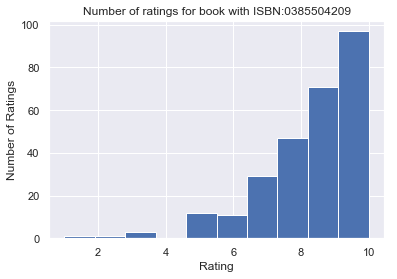

In [116]:
filtered_df.loc[filtered_df['ISBN'] == '0385504209']['Book_Rating'].hist()
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Number of ratings for book with ISBN:0385504209')
plt.show();

*The reason for the previous wrong prediction is now obvious. As we can understand from the plot, rating with 10 this specific book is an outlier. In fact it is the least common rating for this book. The most users have rated it with 1,2,3,5 or 6! So that is why the prediction was around 4...*

### BaselineOnly

### Firstly we are ipmlementing BaselineOnly using SGD

In [117]:
print('Using SGD')

bsl_options = {'method': 'sgd'}
algo = BaselineOnly(bsl_options=bsl_options)


bsl_als_cv = cross_validate(algo, data_train, measures=['RMSE', 'MSE', 'MAE', 'FCP'], cv=5, verbose=False)

Using SGD
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


In [118]:
start = time.time()

# Converting Train & Test Dataframes to csv files.
# I am doing this because I couldn't find an other way to pass the two dataframes for prediction.
filtered_df[['User_ID','ISBN','Book_Rating']].to_csv(r'TempTrainSet.csv',index=False, header=None)
users_books_with_ratings_test.filter(['User_ID', 'ISBN', 'Book_Rating']).to_csv(r'TempTestSet.csv', index = False, header = False)

# Creating a list of a pair of these to csv files.
folds_files = [("TempTrainSet.csv","TempTestSet.csv")]

# Making the reader to understand different column words when they are separated by ','
reader = Reader( sep=',',rating_scale=(1,10))

# Loading the cvs files which contain Train and Test Dataset  in order to be able to be used in Surprise
data = Dataset.load_from_folds(folds_files, reader=reader)
pkf = PredefinedKFold()


for trainset, testset in pkf.split(data):
    #Training & Testing algorithm
    algo.fit(trainset)
    predictions_bsl_sgd = algo.test(testset)

    # Computing and printing Root Mean Squared Error (RMSE)
    accuracy.rmse(predictions_bsl_sgd, verbose=True) # Root Mean Squared Error
    accuracy.mse(predictions_bsl_sgd, verbose=True)  # Mean Squared Error
    accuracy.mae(predictions_bsl_sgd, verbose=True)  # Mean Absolute Error
    accuracy.fcp(predictions_bsl_sgd, verbose=True)  # Fraction of Concordant Pairs
    
    

end = time.time()
elapsed = end - start
print("\nTotal time needed for prediction: " + str(elapsed) + " seconds.")
#print("Number of predictions made: " + str(len(predictions)))

Estimating biases using sgd...
RMSE: 1.8588
MSE: 3.4552
MAE:  1.4758
FCP:  0.3115

Total time needed for prediction: 2.5423920154571533 seconds.


### Then we are ipmlementing Baselineonly using ALS

In [119]:
print('Using ALS')

bsl_options = {'method': 'als'}
algo = BaselineOnly(bsl_options = bsl_options)


bsl_als_cv = cross_validate(algo, data_train, measures=['RMSE', 'MSE', 'MAE', 'FCP'], cv=5, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


In [120]:
start = time.time()

# Converting Train & Test Dataframes to csv files.
# I am doing this because I couldn't find an other way to pass the two dataframes for prediction.
filtered_df[['User_ID','ISBN','Book_Rating']].to_csv(r'TempTrainSet.csv',index=False, header=None)
users_books_with_ratings_test.filter(['User_ID', 'ISBN', 'Book_Rating']).to_csv(r'TempTestSet.csv', index = False, header = False)

# Creating a list of a pair of these to csv files.
folds_files = [("TempTrainSet.csv","TempTestSet.csv")]

# Making the reader to understand different column words when they are separated by ','
reader = Reader( sep=',',rating_scale=(1,10))

# Loading the cvs files which contain Train and Test Dataset  in order to be able to be used in Surprise
data = Dataset.load_from_folds(folds_files, reader=reader)
pkf = PredefinedKFold()


for trainset, testset in pkf.split(data):
    #Training & Testing algorithm
    algo.fit(trainset)
    predictions_bsl_als = algo.test(testset)

    # Computing and printing Root Mean Squared Error (RMSE)
    accuracy.rmse(predictions_bsl_als, verbose=True) # Root Mean Squared Error
    accuracy.mse(predictions_bsl_als, verbose=True)  # Mean Squared Error
    accuracy.mae(predictions_bsl_als, verbose=True)  # Mean Absolute Error
    accuracy.fcp(predictions_bsl_als, verbose=True)  # Fraction of Concordant Pairs
    
    

end = time.time()
elapsed = end - start
print("\nTotal time needed for prediction: " + str(elapsed) + " seconds.")
#print("Number of predictions made: " + str(len(predictions)))



Estimating biases using als...
RMSE: 1.8581
MSE: 3.4526
MAE:  1.4748
FCP:  0.3114

Total time needed for prediction: 2.52274489402771 seconds.


#### BaselineOnly algorithm with ALS gives slightly better metrics than BaselineOnly with SGD, so we are continuing with ALS.

In [121]:
df_extentedPredictions = pd.DataFrame(predictions_bsl_als, columns=['uid','iid','rui','est','details'])
df_extentedPredictions['Iu']= df_extentedPredictions.uid.apply(get_Iu)
df_extentedPredictions['Ui']= df_extentedPredictions.iid.apply(get_Ui)
df_extentedPredictions['err'] = abs(df_extentedPredictions.est - df_extentedPredictions.rui)

In [122]:
best_bsl_als=df_extentedPredictions.sort_values(by='err')[:10]
worst_bsl_als=df_extentedPredictions.sort_values(by='err')[-10:]

In [123]:
print("These are the 10 best predicted ratings: ")
best_bsl_als

These are the 10 best predicted ratings: 


,uid,iid,rui,est,details,Iu,Ui,err
35701,266164,0425146413,8.0,7.999937,{'was_impossible': False},0,16,0.000063
10665,247151,068486424X,8.0,8.000577,{'was_impossible': False},0,6,0.000577
38784,268622,068486424X,8.0,8.000577,{'was_impossible': False},0,6,0.000577
48338,276563,0061093653,8.0,7.999219,{'was_impossible': False},0,5,0.000781
37114,267259,0061093653,8.0,7.999219,{'was_impossible': False},0,5,0.000781
34579,265313,0061093653,8.0,7.999219,{'was_impossible': False},0,5,0.000781
13308,248718,0804118558,8.0,8.000970,{'was_impossible': False},0,5,0.000970
6109,243929,0679761837,8.0,8.001037,{'was_impossible': False},0,6,0.001037
37185,267313,0316316962,8.0,7.998957,{'was_impossible': False},0,10,0.001043
35189,265889,006008460X,8.0,8.001212,{'was_impossible': False},0,6,0.001212


In [124]:
print("These are the worst 10 predicted ratings: ")
worst_bsl_als

These are the worst 10 predicted ratings: 


,uid,iid,rui,est,details,Iu,Ui,err
46852,275111,034530988X,1.0,8.105849,{'was_impossible': False},0,11,7.105849
48058,276264,0849932017,1.0,8.115468,{'was_impossible': False},0,8,7.115468
5410,243312,0765342987,1.0,8.155581,{'was_impossible': False},0,19,7.155581
45098,273898,0451191153,1.0,8.160499,{'was_impossible': False},0,19,7.160499
29938,261829,0316776963,1.0,8.168661,{'was_impossible': False},0,98,7.168661
41367,270605,1558506462,1.0,8.172186,{'was_impossible': False},0,11,7.172186
40931,270154,0316168815,1.0,8.182130,{'was_impossible': False},0,26,7.182130
17624,251541,0316168815,1.0,8.182130,{'was_impossible': False},0,26,7.182130
6147,243930,0349101779,1.0,8.282639,{'was_impossible': False},0,19,7.282639
17876,251754,0385504209,1.0,8.548353,{'was_impossible': False},0,272,7.548353


#### Again, as with SVD-ALS , we can see the worst prediction here is 8,54 which is really far from the real rating of book with ISBN: 0385504209 which is 1,0. It would be a nice idea to try to find out why this bad prediction happened...

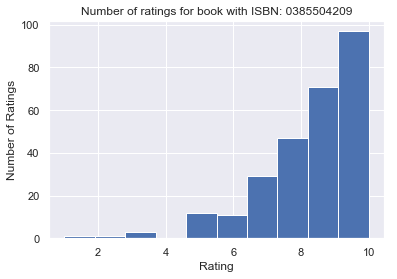

In [125]:
filtered_df.loc[filtered_df['ISBN'] == '0385504209']['Book_Rating'].hist()
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Number of ratings for book with ISBN: 0385504209')
plt.show();

*The reason for the previous wrong prediction is now obvious again. As we can understand from the plot, rating with 10 this specific book is an outlier. In fact it is the least common rating for this book. The most users have rated it with 1,2,3,5 or 6! So that is why the prediction was around 4...*

## Comparison between SVD-ALS and BaselineOnly-ALS

In [126]:
x_algo = ['SVD-ALS', 'BaselineOnly-ALS']
all_algos_cv = [svd_als_cv, bsl_als_cv]

rmse_cv = [round(res['test_rmse'].mean(), 6) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 6) for res in all_algos_cv]
fcp_cv = [round(res['test_fcp'].mean(), 6) for res in all_algos_cv]


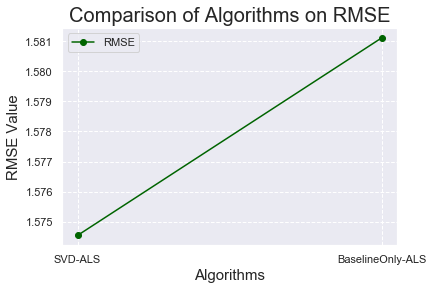

In [127]:

plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=20)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

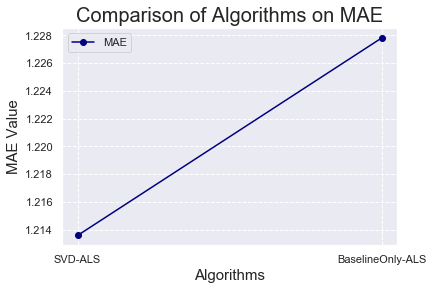

In [128]:

plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=20)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

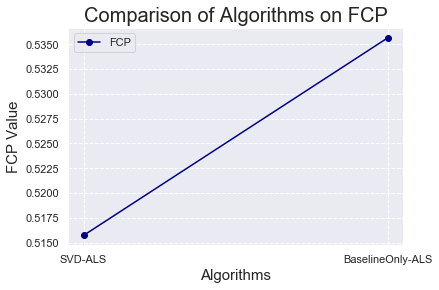

In [129]:
plt.show()

plt.title('Comparison of Algorithms on FCP', loc='center', fontsize=20)
plt.plot(x_algo, fcp_cv, label='FCP', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('FCP Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

*All the plots above show us that SVD-ALS has smaller RMSE and MAE than BaselineOnly. But BaselineOnly has a greater FCP value. Of course we must have in mind that RMSE and MAE the smaller values they have the better it is for the algorithm whereas for FCP is the opposite. The greater it is the better for the algorithm. But looking at the values closely, we have to admit that the differences between them are tiny.*

*The only difference we could say that it is obvious is that SVD is slower because it takes almost 9 seconds to predict the test set while BaselineOnly takes approximately 3 seconds to predict the same test set*



## LightFM
### I decided to check one more method, which is totally different from the previous.
*A hybrid content/collaborative recommender system*

In [180]:

from lightfm.datasets import fetch_movielens
from sklearn import preprocessing
from scipy.sparse import coo_matrix 
from lightfm import LightFM
from lightfm.evaluation import precision_at_k

import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn import preprocessing
from lightfm import LightFM
from scipy.sparse import csr_matrix 
from scipy.sparse import coo_matrix 
from sklearn.metrics import roc_auc_score
import time
from lightfm.evaluation import auc_score
import pickle
import re
import seaborn as sns



#### Keeping only exlicit ratings (from 1 to 10).

In [181]:
# Train Dataset
ratings_new_train = booksRatings_train[booksRatings_train.ISBN.isin(books.ISBN)]
ratings_train = booksRatings_train[booksRatings_train.User_ID.isin(users.User_ID)]
ratings_explicit_train = ratings_new_train[ratings_new_train.Book_Rating != 0]

# Test Dataset
ratings_new_test = booksRatings_test[booksRatings_test.ISBN.isin(books.ISBN)]
ratings_test = booksRatings_test[booksRatings_test.User_ID.isin(users.User_ID)]
ratings_explicit_test = ratings_new_test[ratings_new_test.Book_Rating != 0]

#### Reducing the dataset by keeping only books with 5 or more ratings and users who have rated 5 or more books.

In [182]:
min_book_ratings = 5
min_users = 5

# Train Dataset
counts1_train = ratings_explicit_train['User_ID'].value_counts()
ratings_explicit_train = ratings_explicit_train[ratings_explicit_train['User_ID'].isin(counts1_train[counts1_train >= min_users].index)]
counts_train = ratings_explicit_train['Book_Rating'].value_counts()
ratings_explicit_train = ratings_explicit_train[ratings_explicit_train['Book_Rating'].isin(counts_train[counts_train >= min_book_ratings].index)]


# Test Dataset
counts1_test = ratings_explicit_test['User_ID'].value_counts()
ratings_explicit_test = ratings_explicit_test[ratings_explicit_test['User_ID'].isin(counts1_test[counts1_test >= min_users].index)]
counts_test = ratings_explicit_test['Book_Rating'].value_counts()
ratings_explicit_test = ratings_explicit_test[ratings_explicit_test['Book_Rating'].isin(counts_test[counts_test >= min_book_ratings].index)]

#### Preparing training and test sets, for the training of the algorithm and then for the predictions.

In [183]:

def prepare_train_test(rating_train,rating_test):
    col_names = ['User_ID', 'ISBN']
    rating_test = rating_test[(rating_test['User_ID'].isin(rating_train['User_ID'])) & (rating_test['ISBN'].isin(rating_train['ISBN']))]
    trans_cat_train = dict()
    trans_cat_test = dict()
    for i in  col_names:
        cate_enc = preprocessing.LabelEncoder()
        trans_cat_train[i] = cate_enc.fit_transform(rating_train[i].values)
        trans_cat_test[i] = cate_enc.transform(rating_test[i].values)
    
    # Encoding 
    cate_enc = preprocessing.LabelEncoder()
    ratings = dict()
    ratings['train'] = cate_enc.fit_transform(rating_train.Book_Rating)
    ratings['test'] = cate_enc.transform(rating_test.Book_Rating)
    
    n_users = len(np.unique(trans_cat_train['User_ID']))
    n_items = len(np.unique(trans_cat_train['ISBN']))
    train = coo_matrix((ratings['train'], (trans_cat_train['User_ID'], trans_cat_train['ISBN'])), shape=(n_users, n_items))
    test = coo_matrix((ratings['test'], (trans_cat_test['User_ID'],trans_cat_test['ISBN'])), shape=(n_users, n_items))
    return train, test

In [184]:
train, test = prepare_train_test(ratings_explicit_train,ratings_explicit_test)

In [185]:
see = test.toarray()
see.shape


(11114, 120261)

### I will now use this code  which finds the optimal parameters for LightFM calling.


### WARP
#### Our first attempt on LightFM will be with WARP (Weighted Approximate-Rank Pairwise loss). It maximises the rank of positive examples by repeatedly sampling negative examples until rank violating one is found. Useful when only positive interactions are present and optimising the top of the recommendation list (precision@k) is desired.

#### First of all we are going to find the optimal parameters for calling LightFM with WARP.

In [186]:

from skopt import forest_minimize


def findOptParams(params):
   
    epochs, learning_rate, no_components = params

    WARP_model = LightFM(loss='warp',learning_rate=learning_rate,no_components=no_components)
    WARP_model.fit(train, epochs=epochs, num_threads=4, verbose=True)

    patks = auc_score(WARP_model, test, num_threads=4)
    maptk = np.mean(patks)
    
    res = -maptk
    
    # Just to get rid of some unwanted values
    if np.abs(res + 1) < 0.01 or res < -1.0:
        return 0.0
    else:
        return res


# space = [number of epochs, learning_rate, no_components]
possParams = [(1, 50), (0.0001, 0.5, 'log-uniform'), (1,200 )]

result = forest_minimize(findOptParams, possParams, n_calls=20,random_state=0,verbose=True)

print('Maximimum auc found: {:6.5f}'.format(-result.fun))
print('Optimal parameters:')
parList = ['epochs', 'learning_rate', 'no_components']
for (p, x_) in zip(parList, result.x):
    print('{}: {}'.format(p, x_))

Iteration No: 1 started. Evaluating function at random point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 57.3704
Function value obtained: -0.7443
Current minimum: -0.7443
Iteration No: 2 started. Evaluating function at random point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 3.4889
Function value obtained: -0.6214
Current minimum: -0.7443
Iteration No: 3 started. Evaluating function at random point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoc

In [187]:
start_time = time.time()



WARP_model=LightFM(learning_rate=0.0067,loss='warp', no_components=76)


WARP_model.fit(train,epochs=39,num_threads=4)
auc_train = auc_score(WARP_model, train).mean()
auc_test = auc_score(WARP_model, test).mean()


precision_train = precision_at_k(WARP_model, train, k=10).mean()
precision_test = precision_at_k(WARP_model, test, k=10).mean()


end_time = time.time()
elapsed_time = end_time - start_time
print("Total time needed for LightFM (WARP) " + str(elapsed_time) + " seconds.")

# Printing AUC Scores
print("Train AUC Score: {}".format(auc_train))
print("Test AUC Score: {}".format(auc_test))

# Printing Precision Scores
print("Train Precission Score: {}".format(precision_train))
print("Test Precission Score: {}".format(precision_test))



Total time needed for LightFM (WARP) 263.9456171989441 seconds.
Train AUC Score: 0.8605564832687378
Test AUC Score: 0.8343704342842102
Train Precission Score: 0.0335792675614357
Test Precission Score: 0.20000000298023224


In [188]:
epochs = 39
WARP_duration = []
WARP_auc = []
WARP_precision = []

for epoch in range(epochs):
    start = time.time()
    WARP_model.fit_partial(train, epochs=1)
    WARP_duration.append(time.time() - start)
    WARP_auc.append(auc_score(WARP_model, test, train_interactions=train).mean())
    WARP_precision.append(precision_at_k(WARP_model, test, train_interactions=train, k=10).mean())


### BPR 
#### Now, we are going to try BPR (Bayesian Personalised Ranking  pairwise loss).  It Maximises the prediction difference between a positive example and a randomly chosen negative example. Useful when only positive interactions are present and optimising ROC AUC is desired.


#### We are now using the same parameters for BPR as with WARP, in order to compare them later.

In [189]:
start_time = time.time()

BPR_model=LightFM(learning_rate=0.0067,loss='bpr', no_components=76)
BPR_model.fit(train,epochs=39,num_threads=4)
auc_train = auc_score(BPR_model, train).mean()
auc_test = auc_score(BPR_model, test).mean()


precision_train = precision_at_k(BPR_model, train, k=10).mean()
precision_test = precision_at_k(BPR_model, test, k=10).mean()


end_time = time.time()
elapsed_time = end_time - start_time
print("Total time needed for LightFM (BPR) " + str(elapsed_time) + " seconds.")

# Printing AUC Scores
print("Train AUC Score: {}".format(auc_train))
print("Test AUC Score: {}".format(auc_test))

# Printing Precision Scores
print("Train Precission Score: {}".format(precision_train))
print("Test Precission Score: {}".format(precision_test))

Total time needed for LightFM (BPR) 268.3083860874176 seconds.
Train AUC Score: 0.6222692728042603
Test AUC Score: 0.4642690122127533
Train Precission Score: 0.02208925597369671
Test Precission Score: 0.0


In [190]:
epochs = 39
BPR_duration = []
BPR_auc = []
BPR_precision = []

for epoch in range(epochs):
    start = time.time()
    BPR_model.fit_partial(train, epochs=1)
    BPR_duration.append(time.time() - start)
    BPR_auc.append(auc_score(BPR_model, test, train_interactions=train).mean())
    BPR_precision.append(precision_at_k(BPR_model, test, train_interactions=train, k=10).mean())
    

#### Have in mind that Precision scores are focused on the quality of ranking of the top of the list. So, the important thing is that the top K items are mostly positive.

#### On the other hand...

#### AUC scores are focused on the quality of all rankings in general." It can be interpreted as the probability that a randomly chosen positive item is ranked  higher than a randomly chosen negative item" and also "a high AUC score will then give you confidence that your ranking is of high quality throughout" as mentioned here: "https://stackoverflow.com/questions/45451161/evaluating-the-lightfm-recommendation-model" .



####  Plotting AUCs of WARP and BPR

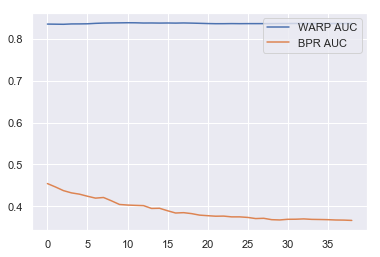

In [191]:
x = np.arange(epochs)
plt.plot(x, np.array(WARP_auc))
plt.plot(x, np.array(BPR_auc))
plt.legend(['WARP AUC', 'BPR AUC'], loc='upper right')
plt.show()

*And of course, it is pretty much obvious from the plot above, that WARP produces better results than BPR. As it also seems, after the 20th epoch it starts to decrease a little bit which means that it would be better to stop somewhere there when fitting.*

#### Plotting Precisions of WARP and BPR

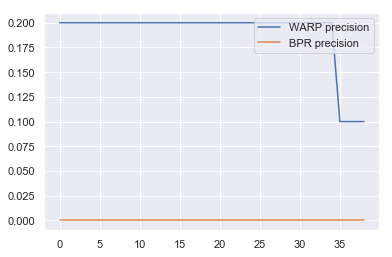

In [192]:
x = np.arange(epochs)
plt.plot(x, np.array(WARP_precision))
plt.plot(x, np.array(BPR_precision))
plt.legend(['WARP precision', 'BPR precision'], loc='upper right')
plt.show()

*WARP appears to hae a better precision at all for k=10.*

#### Plotting duration times of WARP and BPR

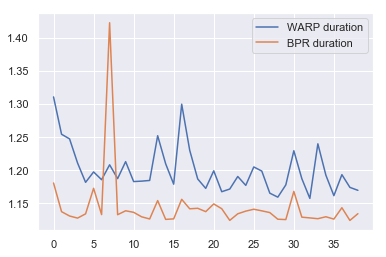

In [193]:
x = np.arange(epochs)
plt.plot(x, np.array(WARP_duration))
plt.plot(x, np.array(BPR_duration))
plt.legend(['WARP duration', 'BPR duration'], loc='upper right')
plt.show()

*It is interesting that WARP is slower than BPR for all epochs except from around 7th epoch when suddenly BPR increases its duration a lot and then it decreases again.*

### Since at this moment we care more about good predictions and less about duration times, we consider WARP as the optimal method for LightFM.